# Радиосистемы контроля и управления (РСКУ)

In [93]:
from math import atan2, degrees, radians, tan, cos, sin, sqrt
import matplotlib.pyplot as plt

## Моделирование метода прямого наведения с постоянным углом упреждения

In [94]:
class Object:
    def __init__(self, initialX, initialY):
        self.x = initialX
        self.y = initialY
    def getCoordinate(self):
        return list(zip(self.x, self.y))
    def currentPosition(self):
        return [self.x[-1], self.y[-1]]
    def getDirection(self):
        dX = self.x[-1] - self.x[-2]
        dY = self.y[-1] - self.y[-2]
        return atan2(dY, dX)
    def getVelocity(self):
        dT = 1 # TODO - где взять???
        dX = self.x[-1] - self.x[-2]
        dY = self.y[-1] - self.y[-2]
        return (dX/dT, dY/dT, sqrt((dX/dT)**2 + (dY/dT)**2))
    def moveTo(self, newX, newY):
        self.x.append(newX)
        self.y.append(newY)

Характер маневра цели

In [95]:
def linearTargetMovement(Xpos, Ypos, step):
    newX = Xpos - step
    newY = Ypos
    return newX, newY

## Метод прямого наведения с постоянным углом упреждения

In [96]:
def directWithConstLeadAngle(vartheta, epsilon ,phi_0):
    return vartheta - epsilon - phi_0

In [97]:
controlObject1 = Object(initialX=[0,0], initialY=[0,1])
target1 = Object(initialX=[9,10],
                initialY=[10, 10])

for i in range(10):
# for targetPosition in target.getCoordinate():
    targetPosition = target1.getCoordinate()[-1]
    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target1.moveTo(newTargetX, newTargetY)
    step = 2
    
    dX = targetPosition[0] - controlObject1.currentPosition()[0]
    dY = targetPosition[1] - controlObject1.currentPosition()[1]
    
    epsilon = atan2(dY, dX)
    vartheta  = controlObject1.getDirection()
    
    delta = directWithConstLeadAngle(vartheta, epsilon, radians(30))

    print(f"---------------------------")
    print(targetPosition)
    print(f"epsilon: {degrees(epsilon)}")
    print(f"vartheta: {degrees(vartheta)}")
    print(f"delta: {degrees(delta)}")
    print(f"vartheta + delta: {degrees(vartheta - delta)}")
    print(f"---------------------------")


    # newPositionX = step + controlObject.currentPosition()[0]
    # newPositionY = tan(vartheta + delta)*step + controlObject.currentPosition()[1]
    
    newPositionX = cos(vartheta - delta)*step + controlObject1.currentPosition()[0]
    newPositionY = sin(vartheta - delta)*step + controlObject1.currentPosition()[1]

    controlObject1.moveTo(newPositionX, newPositionY)
    
    presition = step*2
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("001 - промах в норме")
        break



---------------------------
(10, 10)
epsilon: 41.98721249581666
vartheta: 90.0
delta: 18.012787504183343
vartheta + delta: 71.98721249581666
---------------------------
---------------------------
(9, 10)
epsilon: 40.26005852146749
vartheta: 71.98721249581666
delta: 1.7271539743491766
vartheta + delta: 70.2600585214675
---------------------------
---------------------------
(8, 10)
epsilon: 37.87363440271228
vartheta: 70.2600585214675
delta: 2.386424118755219
vartheta + delta: 67.87363440271227
---------------------------
---------------------------
(7, 10)
epsilon: 34.17598847587974
vartheta: 67.87363440271227
delta: 3.697645926832533
vartheta + delta: 64.17598847587975
---------------------------
---------------------------
(6, 10)
epsilon: 26.888557137453784
vartheta: 64.17598847587975
delta: 7.287431338425966
vartheta + delta: 56.88855713745378
---------------------------
001 - промах в норме


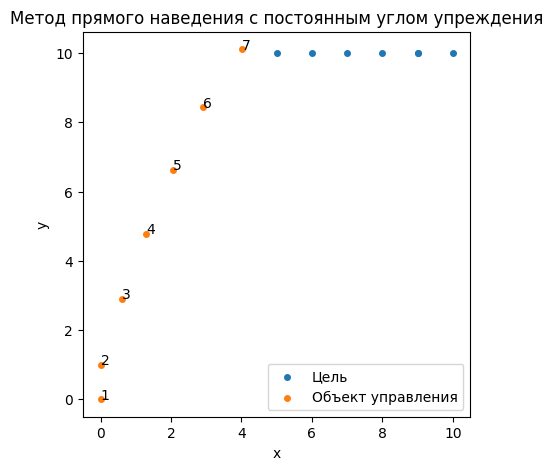

In [98]:
fig, ax = plt.subplots(1,1)

plt.scatter(target1.x, target1.y, linewidth=2.0, marker=".", label='Цель')
plt.scatter(controlObject1.x, controlObject1.y, linewidth=2.0, marker=".", label='Объект управления')

plt.title("Метод прямого наведения с постоянным углом упреждения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)

# Добавление подписей номеров точек
for i, (x_val, y_val) in enumerate(zip(controlObject1.x, controlObject1.y)):
    plt.text(x_val, y_val, str(i+1))

fig.set_size_inches(5, 5)
plt.legend()
plt.show()


## Метод прямого наведения

In [99]:
def direct(vartheta, epsilon):
    return vartheta - epsilon

In [100]:
controlObject2 = Object(initialX=[0,0], initialY=[0,1])
target2 = Object(initialX=[9,10],
                initialY=[10, 10])

for i in range(10):
# for targetPosition in target2.getCoordinate():

    
    targetPosition = target2.getCoordinate()[-1]
    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target2.moveTo(newTargetX, newTargetY)
    step = 2
    
    dX = targetPosition[0] - controlObject2.currentPosition()[0]
    dY = targetPosition[1] - controlObject2.currentPosition()[1]
    
    epsilon = atan2(dY, dX)
    vartheta  = controlObject2.getDirection()
    
    delta = direct(vartheta, epsilon)

    # print(f"---------------------------")
    # print(targetPosition)
    # print(f"epsilon: {degrees(epsilon)}")
    # print(f"vartheta: {degrees(vartheta)}")
    # print(f"delta: {degrees(delta)}")
    # print(f"vartheta + delta: {degrees(vartheta - delta)}")
    # print(f"---------------------------")


    # newPositionX = step + controlObject2.currentPosition()[0]
    # newPositionY = tan(vartheta + delta)*step + controlObject2.currentPosition()[1]
    
    newPositionX = cos(vartheta - delta)*step + controlObject2.currentPosition()[0]
    newPositionY = sin(vartheta - delta)*step + controlObject2.currentPosition()[1]

    controlObject2.moveTo(newPositionX, newPositionY)
    
    presition = step*2
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("002 - промах в норме")
        break
    

002 - промах в норме


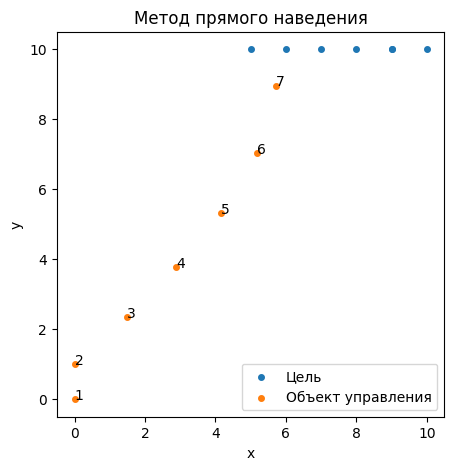

In [101]:
fig, ax = plt.subplots(1,1)

plt.scatter(target2.x, target2.y, linewidth=2.0, marker=".", label='Цель')
plt.scatter(controlObject2.x, controlObject2.y, linewidth=2.0, marker=".", label='Объект управления')

plt.title("Метод прямого наведения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)

# Добавление подписей номеров точек
for i, (x_val, y_val) in enumerate(zip(controlObject2.x, controlObject2.y)):
    plt.text(x_val, y_val, str(i+1))

fig.set_size_inches(5, 5)
plt.legend()
plt.show()

## Метод параллельного сближения

In [102]:
def parallelApproach(q_o, V_o, q_t, V_t):
    return q_o - V_t/V_o*sin(q_t)

In [103]:
controlObject3 = Object(initialX=[0,0], initialY=[0,1])
target3 = Object(initialX=[9,10],
                initialY=[10, 10])

for i in range(10):
    targetPosition = target3.getCoordinate()[-1]
    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target3.moveTo(newTargetX, newTargetY)
    V_t = target3.getVelocity()[2]

    step = 2
    
    dX = targetPosition[0] - controlObject3.currentPosition()[0]
    dY = targetPosition[1] - controlObject3.currentPosition()[1]
    epsilon = atan2(dY, dX)

    vartheta  = controlObject3.getDirection()
    q_t = target3.getDirection() + epsilon
    q_o = vartheta - epsilon
    V_o = controlObject3.getVelocity()[2]
    
    delta = parallelApproach(q_o, V_o, q_t, V_t)

    newPositionX = cos(vartheta - delta)*step + controlObject3.currentPosition()[0]
    newPositionY = sin(vartheta - delta)*step + controlObject3.currentPosition()[1]

    print(f"---------------------------")
    print(f"epsilon: {degrees(epsilon)}")
    print(f"vartheta: {degrees(vartheta)}")
    print(f"delta: {degrees(delta)}")
    print(f"step + delta: {degrees(step + delta)}")
    print(f"---------------------------")

    controlObject3.moveTo(newPositionX, newPositionY)
    
    presition = step*2
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("003 - промах в норме")
        break

---------------------------
epsilon: 41.98721249581666
vartheta: 90.0
delta: 86.34164326925152
step + delta: 200.93320229541615
---------------------------
---------------------------
epsilon: 51.71158643398318
vartheta: 3.658356730748485
delta: -25.56745270195858
step + delta: 89.02410632420606
---------------------------
---------------------------
epsilon: 61.65963859223415
vartheta: 29.22580943270706
delta: -7.219584694505166
step + delta: 107.37197433165949
---------------------------
---------------------------
epsilon: 76.1819686631727
vartheta: 36.445394127212225
delta: -11.917778662528004
step + delta: 102.67378036363664
---------------------------
---------------------------
epsilon: 97.42091847261825
vartheta: 48.36317278974022
delta: -20.649808545147927
step + delta: 93.94175048101671
---------------------------
---------------------------
epsilon: 125.60016637249682
vartheta: 69.01298133488817
delta: -33.293612498897886
step + delta: 81.29794652726676
---------------------

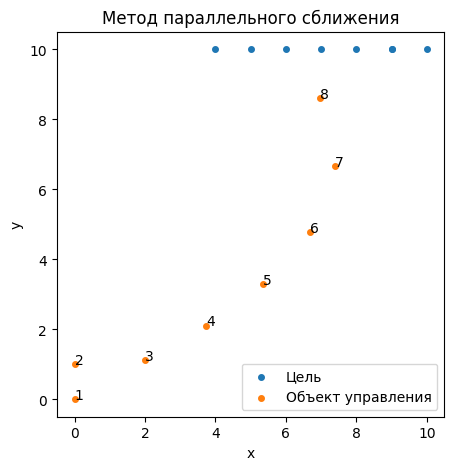

In [104]:
fig, ax = plt.subplots(1,1)

plt.scatter(target3.x, target3.y, linewidth=2.0, marker=".", label='Цель')
plt.scatter(controlObject3.x, controlObject3.y, linewidth=2.0, marker=".", label='Объект управления')

plt.title("Метод параллельного сближения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)

# Добавление подписей номеров точек
for i, (x_val, y_val) in enumerate(zip(controlObject3.x, controlObject3.y)):
    plt.text(x_val, y_val, str(i+1))

fig.set_size_inches(5, 5)
plt.legend()
plt.show()